## Motivation 

We will solve colorizing black-and-white images using neural networks. 

With a working model we will be able to restore old photos, which would be very time demanding and often 
inaccurate to reproduce manually in software such as Photoshop.

We used a public dataset of images collected from Unsplash. It contains creative common pictures by professional photographers. They come from various domains, e.g. human faces, nature, city environment, buildings, vehicles, food and so on.

## Related Work

We did not find use any other work (other than the one described in baseline) as an inspiration for our solution, 

## Dataset and data analysis

The dataset can be found [here](https://www.floydhub.com/emilwallner/datasets/colornet). The data analysis is in "./analysis.ipynb".

## Neural Model Architecture

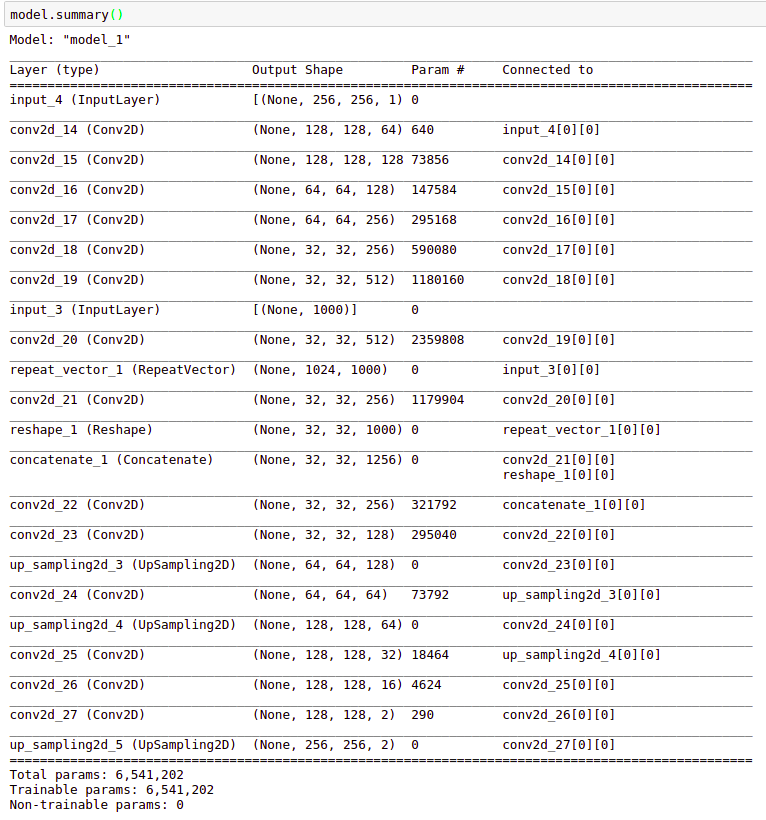

Compared to the baseline solution, we extended the model by engaging more convolutional layers the the encoder and two more to the decoder. In the baseline, we used a ResNet inception embedding layer. In the final submission, we experimented by changing the ResNet embedding layer to VGG19.

## Implementation changes

For the sake of computation efficiency and deduplication, we precomputed respective embeddings and saved them to csv_files in "./precomputed_inputs", which are loaded before model training.

We refactored existing model creation, training, visualization code and split them to individual files.

We added logging to better understand progress of training. Logs can be found in "/logs/<model>/". We keep both training and validation logs.

We tried a different optimizer, "Adam" instead of "rmsprop". 

Previously, we did not save the predicted images. For better navigation and backtracing, we now keep training and validation images in "/models/<model>/img/". Image original state, black and white variation and our predicted version can be seen for comparison. We can also find model checkpoints and weights in "/models/<model>" directory.



## Training routine

Model training can be found in "/src/model/train_model.py". As mentioned before, logging accompanies the whole process of training. Training data and validation data are loaded and they are generated into required format in batches (format described in baseline submission). We initialize tensorboard and a checkpoint is created. Afterwards, steps of training are calculated so that all specified images are included in each epoch. Finally, model is created and the training begins with the aforementioned callbacks and with specified constants, such as number of epochs and number of steps.

## Experiments

Because of empirical nature of our task, we can't distinctly declare whether image colorization was successful or  not. We can compute color distance of original and predicted images, but this metric might often be misleading, since colorizing every picture with a shade of brown would yield fair results. On the other hand, colorizing majority of a picture with the right color but colorizing the rest with a wrong color would sometimes give even worse results than sticking with the shades of brown.

Thus, we conducted only empirical experiments, where we tried different variations, such as changing the embedding layer (ResNet/VGG19), using a simple model and a more complicated one, training on fewer images and training on more images. We saved the models (their images, weights, checkpoints) we found at least relatively successful (stored in "/models"):

1. resnet_rmsprop
2. vgg19_rmsprop
3. 20_images_trimmed_koalarization
4. 64_images_trimmed_koalarization

## Results

Without using the embedding layer, images always turned out brown. After using either ResNet or VGG19 embedding layers, the brown coloring persisted from the start. The local minimum of painting images brown halted models from further training and they got stuck. Methods such as weight initialization, batch normalization, learning rate adjustment, and slow degradation are used to overcome this issue. After some experimentation, the model managed to extract features from images and colorize them accordingly. That means trees started being green, faces started being realistically colored.

In [24]:
import matplotlib.pyplot as plt
def show_images(bw_img, original_img, predict_img):
    plt.figure(figsize=(10, 30))

    plt.subplot(1,3,1)
    plt.imshow(bw_img, cmap=plt.cm.gray)
    
    plt.subplot(1,3,2)
    plt.imshow(original_img, cmap=plt.cm.binary)

    plt.subplot(1,3,3)
    plt.imshow(predict_img, cmap=plt.cm.binary)
    
    plt.show()
    
def show_sample(img_path, arr):
    for i in arr:
        bw = plt.imread(f'{img_path}/test_{i}_bw.jpg')
        og = plt.imread(f'{img_path}/test_{i}_original.jpg')
        predict = plt.imread(f'{img_path}/test_{i}_predict.jpg')
        
        show_images(bw, og, predict)

### ResNet RMSPROP

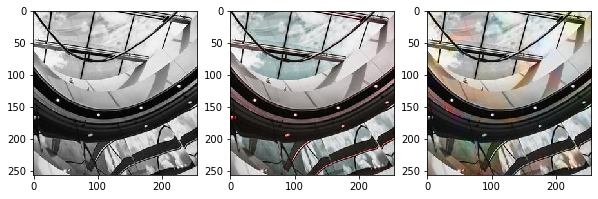

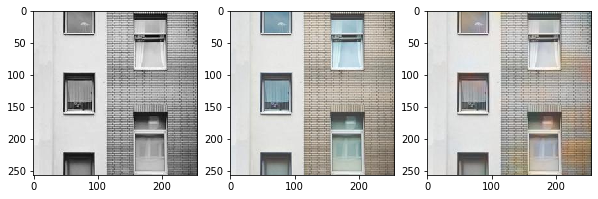

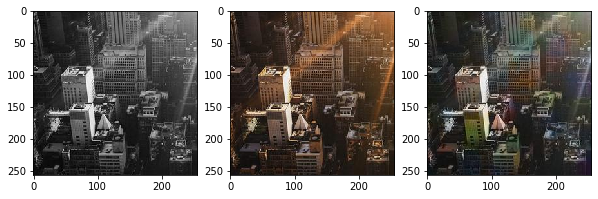

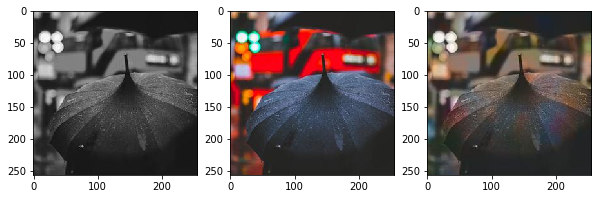

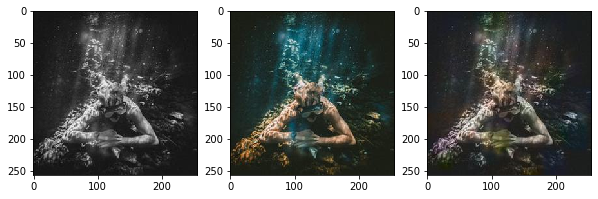

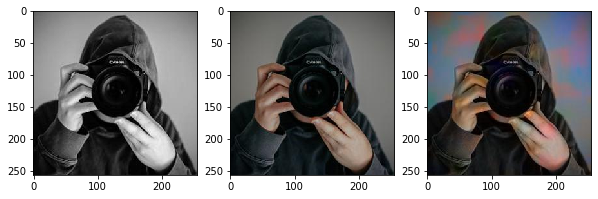

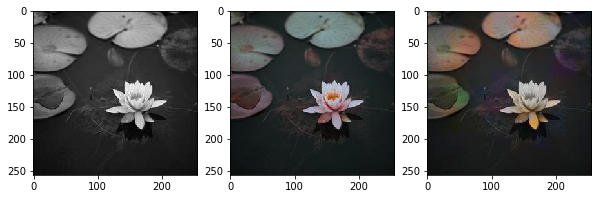

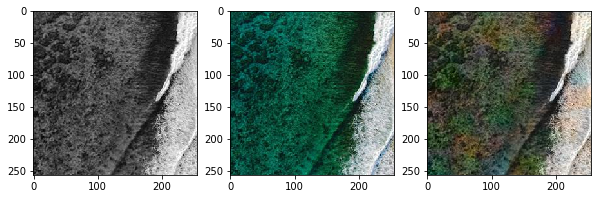

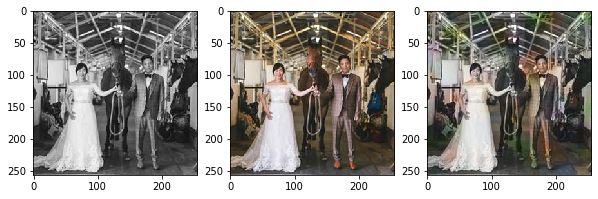

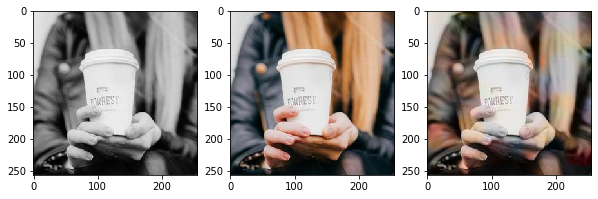

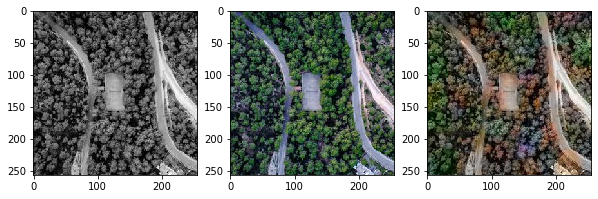

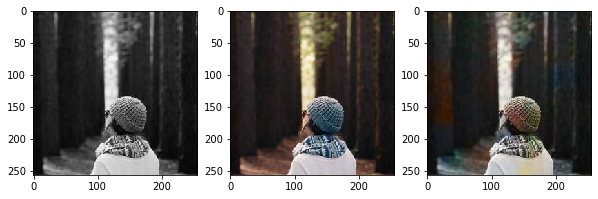

In [28]:
show_sample('./models/resnet_rmsprop_big_model_20191201-205151_7435_images_koalarization/img', [5, 6, 11, 12, 13, 17, 18, 22, 31, 35, 42, 48])

### VGG RMSPROP

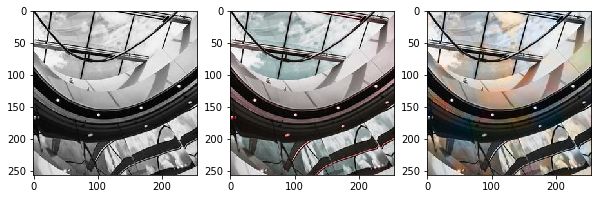

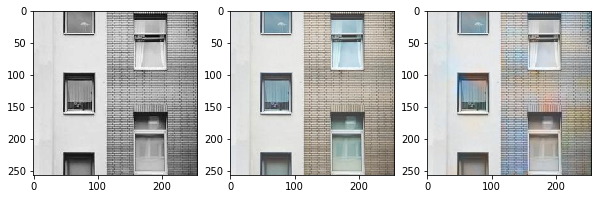

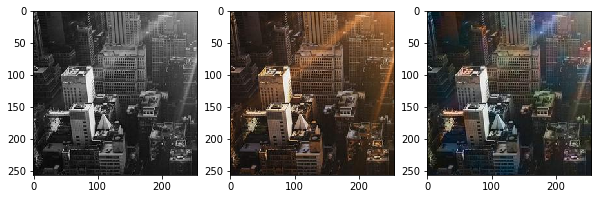

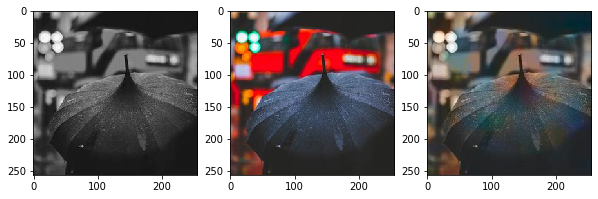

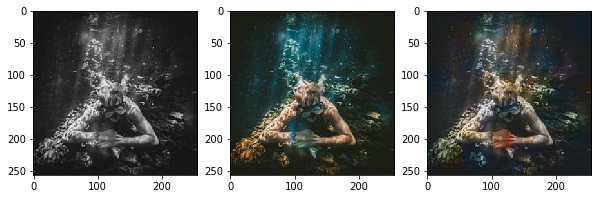

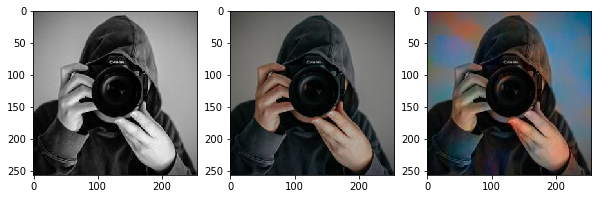

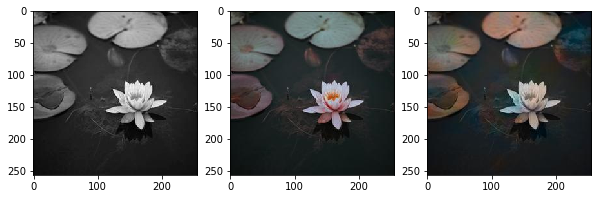

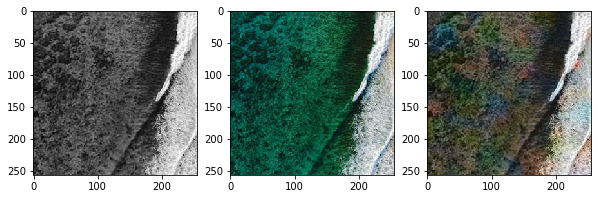

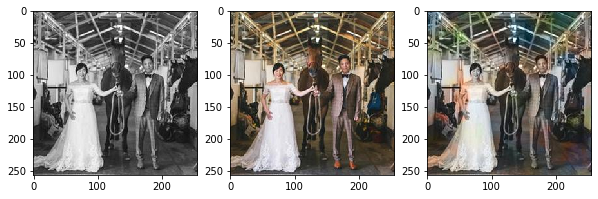

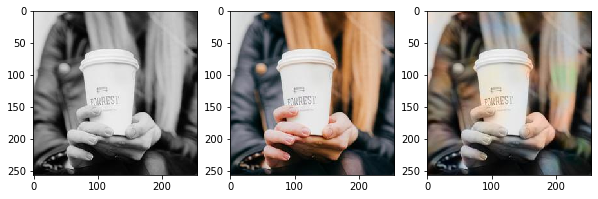

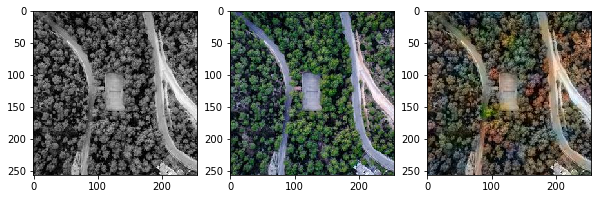

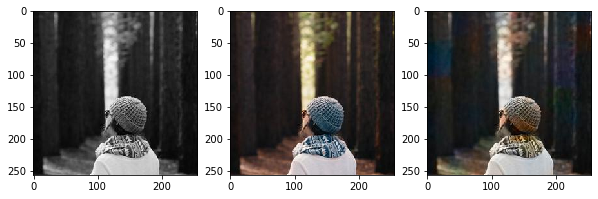

In [29]:
show_sample('./models/vgg19_rmsprop_big_model_20191202-210346_7435_images_koalarization/img', [5, 6, 11, 12, 13, 17, 18, 22, 31, 35, 42, 48])

Both VGG and ResNet embedded models were able to learn colorizing to a certain extent, VGG does better on some images and ResNet does better on another ones. Experiment of changing the embedding layer did not change as much as we expected.

Previously we used a simpler model. Images that it predicted are stored in 20_images_trimmed_koalarization, 64_images_trimmed_koalarization. We discarded the simple model since the more complicated one yielded much better results.